# Results Code

### Research Question 1: How do the first three natural frequencies $\{\omega_n\}$ scale with beam length $L$, flexural rigidity $EI$, and mass per unit length $\rho A$?

Created 3 figures that plot how the first three natural frequencies vary with the described quantities, using the Newmark-beta approach.

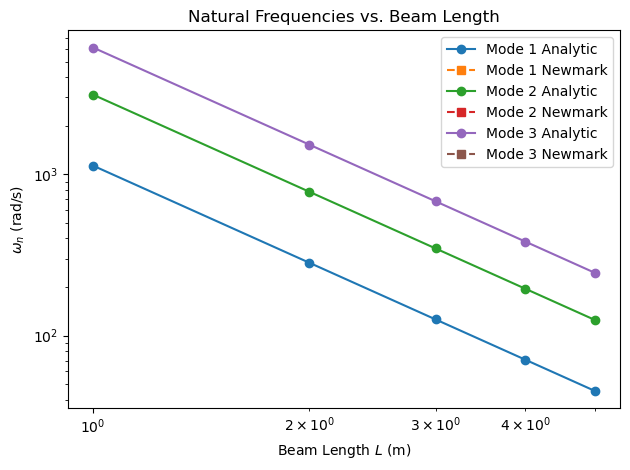

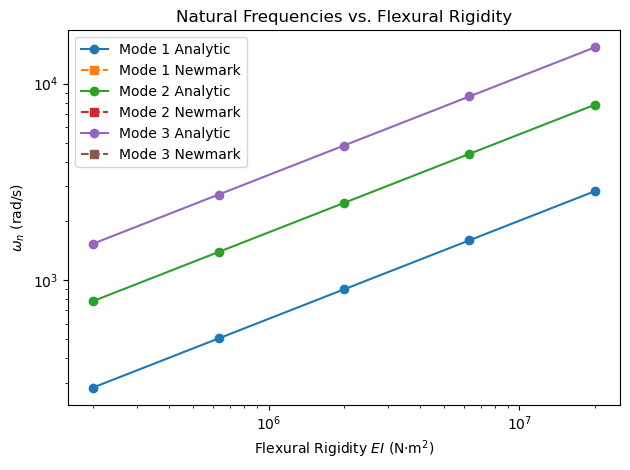

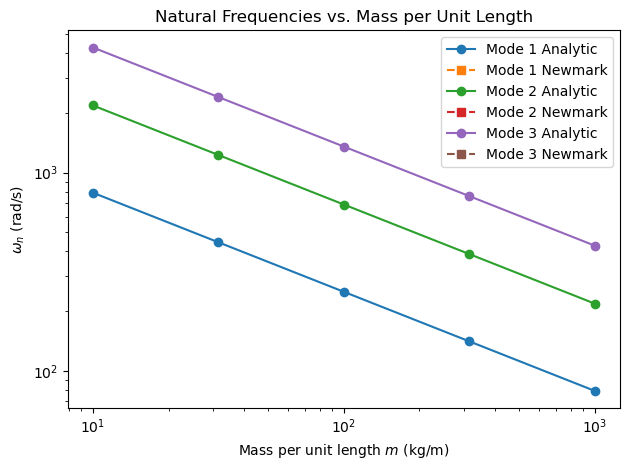

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def newmark_free_vibration(m, k, u0, v0, dt, nt, beta=1/4, gamma=1/2):
    """Newmark-β integration for m*u_dd + k*u = 0."""
    a0 = m / (beta * dt**2)
    keff = k + a0
    u = np.zeros(nt+1)
    a = np.zeros(nt+1)
    v = np.zeros(nt+1)
    u[0], v[0] = u0, v0
    a[0] = -k*u0/m
    for n in range(nt):
        u_pred = u[n] + dt*v[n] + dt**2*(0.5-beta)*a[n]
        v_pred = v[n] + dt*(1-gamma)*a[n]
        a_new = (-k*u_pred) / keff
        u[n+1] = u_pred + beta*dt**2*a_new
        v[n+1] = v_pred + gamma*dt*a_new
        a[n+1] = a_new
    return u

def estimate_frequency(u, dt):
    """Estimate ω from zero crossings of u(t)."""
    times = []
    for i in range(1, len(u)):
        if u[i-1] > 0 and u[i] < 0:
            frac = u[i-1] / (u[i-1] - u[i])
            times.append((i-1 + frac) * dt)
    if len(times) < 3:
        return np.nan
    half_periods = np.diff(times)
    avg_hp = np.mean(half_periods[1:])
    return 2*np.pi/(2*avg_hp)

# Modal coefficients
betas = np.array([4.730, 7.853, 10.996])

# Baseline properties
E = 2e11       # Pa
I0 = 1e-6      # m^4
rho = 7800     # kg/m^3
A0 = 0.01      # m^2
m0 = rho * A0  # kg/m

# Reference length for EI and mass sweeps
L_ref = 2.0

# 1) Sweep Beam Length L
L_vals = np.array([1,2,3,4,5], dtype=float)
omega_ana_L = np.zeros((3, len(L_vals)))
omega_num_L = np.zeros_like(omega_ana_L)

for j, L in enumerate(L_vals):
    for i, β in enumerate(betas):
        omega_ana = β**2 * np.sqrt(E*I0/(m0*L**4))
        m_n = m0 * L/2
        k_n = m_n * omega_ana**2
        dt = (2*np.pi/omega_ana)/50
        nt = int(5*(2*np.pi/omega_ana)/dt)
        u = newmark_free_vibration(m_n, k_n, 1.0, 0.0, dt, nt)
        omega_num = estimate_frequency(u, dt)
        omega_ana_L[i, j] = omega_ana
        omega_num_L[i, j] = omega_num

# Plot frequencies vs L
plt.figure()
for i in range(3):
    plt.loglog(L_vals, omega_ana_L[i], 'o-', label=f'Mode {i+1} Analytic')
    plt.loglog(L_vals, omega_num_L[i], 's--', label=f'Mode {i+1} Newmark')
plt.xlabel('Beam Length $L$ (m)')
plt.ylabel(r'$\omega_n$ (rad/s)')
plt.title('Natural Frequencies vs. Beam Length')
plt.legend()
plt.tight_layout()
plt.show()

# 2) Sweep Flexural Rigidity EI
I_vals = np.logspace(-6, -4, 5)
EI_vals = E * I_vals
omega_ana_EI = np.zeros((3, len(EI_vals)))
omega_num_EI = np.zeros_like(omega_ana_EI)

for j, EI in enumerate(EI_vals):
    for i, β in enumerate(betas):
        omega_ana = β**2 * np.sqrt(EI/(m0*L_ref**4))
        m_n = m0 * L_ref/2
        k_n = m_n * omega_ana**2
        dt = (2*np.pi/omega_ana)/50
        nt = int(5*(2*np.pi/omega_ana)/dt)
        u = newmark_free_vibration(m_n, k_n, 1.0, 0.0, dt, nt)
        omega_num = estimate_frequency(u, dt)
        omega_ana_EI[i, j] = omega_ana
        omega_num_EI[i, j] = omega_num

# Plot frequencies vs EI
plt.figure()
for i in range(3):
    plt.loglog(EI_vals, omega_ana_EI[i], 'o-', label=f'Mode {i+1} Analytic')
    plt.loglog(EI_vals, omega_num_EI[i], 's--', label=f'Mode {i+1} Newmark')
plt.xlabel('Flexural Rigidity $EI$ (N·m$^2$)')
plt.ylabel(r'$\omega_n$ (rad/s)')
plt.title('Natural Frequencies vs. Flexural Rigidity')
plt.legend()
plt.tight_layout()
plt.show()

# 3) Sweep Mass per Length m
m_vals = np.logspace(1, 3, 5)
omega_ana_m = np.zeros((3, len(m_vals)))
omega_num_m = np.zeros_like(omega_ana_m)

for j, m_test in enumerate(m_vals):
    for i, β in enumerate(betas):
        omega_ana = β**2 * np.sqrt(E*I0/(m_test*L_ref**4))
        m_n = m_test * L_ref/2
        k_n = m_n * omega_ana**2
        dt = (2*np.pi/omega_ana)/50
        nt = int(5*(2*np.pi/omega_ana)/dt)
        u = newmark_free_vibration(m_n, k_n, 1.0, 0.0, dt, nt)
        omega_num = estimate_frequency(u, dt)
        omega_ana_m[i, j] = omega_ana
        omega_num_m[i, j] = omega_num

# Plot frequencies vs m
plt.figure()
for i in range(3):
    plt.loglog(m_vals, omega_ana_m[i], 'o-', label=f'Mode {i+1} Analytic')
    plt.loglog(m_vals, omega_num_m[i], 's--', label=f'Mode {i+1} Newmark')
plt.xlabel('Mass per unit length $m$ (kg/m)')
plt.ylabel(r'$\omega_n$ (rad/s)')
plt.title('Natural Frequencies vs. Mass per Unit Length')
plt.legend()
plt.tight_layout()
plt.show()


### Research Question 2: For a harmonic transverse load 
$$
F(x,t) = F_0 \sin\bigl(\omega\,t\bigr)\,\sin\!\Bigl(\frac{\pi x}{L}\Bigr)
$$
### how does the amplitude of steady‐state oscillation depend on the forcing frequency $\omega$, load amplitude $F_0$, and damping coefficient~$c$?

Created 2 figures that plot the steady-state amplitude and phase lag vs. forcing frequency.

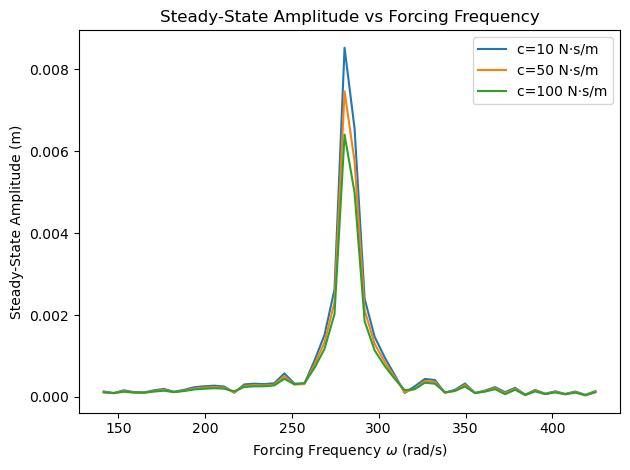

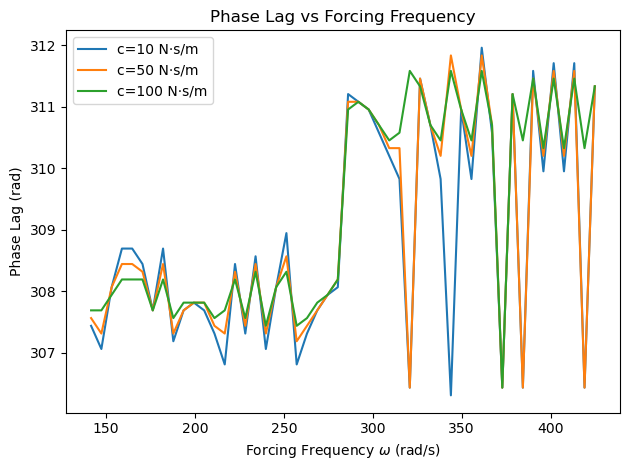

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Newmark-beta time integration for forced, damped SDOF
def newmark_beta(M, C, K, F_func, u0, v0, dt, n_steps, beta=1/4, gamma=1/2):
    a0 = 1.0/(beta*dt**2)
    a1 = gamma/(beta*dt)
    a2 = 1.0/(beta*dt)
    a3 = 1.0/(2*beta) - 1
    a4 = gamma/beta - 1
    a5 = dt*(gamma/(2*beta) - 1)
    K_eff = K + a0*M + a1*C
    u = np.zeros(n_steps+1)
    v = np.zeros(n_steps+1)
    a = np.zeros(n_steps+1)
    t = np.linspace(0, n_steps*dt, n_steps+1)
    u[0], v[0] = u0, v0
    a[0] = (F_func(0) - C*v0 - K*u0)/M
    for n in range(n_steps):
        F_eff = (F_func(t[n+1]) 
                 + M*(a0*u[n] + a2*v[n] + a3*a[n])
                 + C*(a1*u[n] + a4*v[n] + a5*a[n]))
        u[n+1] = F_eff / K_eff
        a[n+1] = a0*(u[n+1] - u[n]) - a2*v[n] - a3*a[n]
        v[n+1] = v[n] + dt*((1-gamma)*a[n] + gamma*a[n+1])
    return t, u

# Physical and modal parameters
rho = 7800       # kg/m^3
A = 0.01         # m^2
m0 = rho*A       # kg/m (mass per length)
E = 2e11         # Pa
I = 1e-6         # m^4
L = 2.0          # m (beam length)

# First mode
beta1 = 4.730
omega1 = beta1**2 * np.sqrt(E*I/(m0*L**4))
m1 = m0 * L/2
k1 = m1 * omega1**2

# Forcing parameters
F0 = 500        # N (modal force amplitude)
c_values = [10, 50, 100]  # damping per unit length N·s/m
C_values = [c*(L/2) for c in c_values]  # modal damping

# Frequency sweep
omega_vals = np.linspace(0.5*omega1, 1.5*omega1, 50)
amplitudes = {c: [] for c in c_values}
phases = {c: [] for c in c_values}

for c, C1 in zip(c_values, C_values):
    for omega in omega_vals:
        F_func = lambda t: F0 * np.sin(omega*t)
        T = 2*np.pi/omega
        dt = T/50
        n_steps = int(50*T/dt)
        t, u = newmark_beta(m1, C1, k1, F_func, 0.0, 0.0, dt, n_steps)
        # Extract last cycle
        mask = t > (t[-1] - T)
        t_c = t[mask]; u_c = u[mask]
        amplitudes[c].append(np.max(u_c))
        idx_peak = np.argmax(u_c)
        t_peak = t_c[idx_peak]
        phi = omega*t_peak - np.pi/2
        phases[c].append(phi)

# Plot amplitude vs frequency
plt.figure()
for c in c_values:
    plt.plot(omega_vals, amplitudes[c], label=f'c={c} N·s/m')
plt.xlabel(r'Forcing Frequency $\omega$ (rad/s)')
plt.ylabel('Steady-State Amplitude (m)')
plt.title('Steady-State Amplitude vs Forcing Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# Plot phase vs frequency
plt.figure()
for c in c_values:
    plt.plot(omega_vals, phases[c], label=f'c={c} N·s/m')
plt.xlabel(r'Forcing Frequency $\omega$ (rad/s)')
plt.ylabel('Phase Lag (rad)')
plt.title('Phase Lag vs Forcing Frequency')
plt.legend()
plt.tight_layout()
plt.show()


### Research Question 4: How sensitive is the numerical solution to boundary‐condition enforcement (clamped vs.\ simply supported ends)?

Created a table that lists the forced response at $\omega = \omega_1$ and peak amplitude $U_{max}$ for CC and SS beams. Also created a figure that plots the resonance curves for both beams.

,Boundary Condition,$\omega_1$ (rad/s),$U_{\max}$ (m)
0,Clamped–clamped,283.223957,0.004547
1,Simply supported,124.941711,0.021473


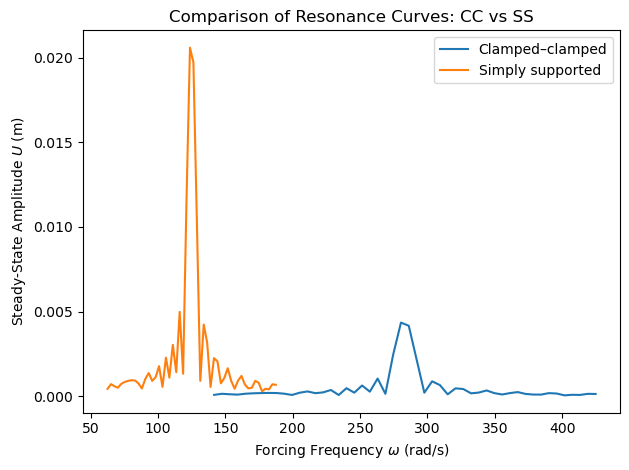

In [25]:
import numpy as np
import pandas as pd
from IPython.display import display

# Newmark-beta integration for forced, damped SDOF
def newmark_beta(M, C, K, F_func, u0, v0, dt, n_steps, beta=1/4, gamma=1/2):
    a0 = 1/(beta*dt**2)
    a1 = gamma/(beta*dt)
    a2 = 1/(beta*dt)
    a3 = 1/(2*beta) - 1
    a4 = gamma/beta - 1
    a5 = dt*(gamma/(2*beta) - 1)
    K_eff = K + a0*M + a1*C
    u = np.zeros(n_steps+1)
    v = np.zeros(n_steps+1)
    a = np.zeros(n_steps+1)
    t = np.linspace(0, n_steps*dt, n_steps+1)
    u[0], v[0] = u0, v0
    a[0] = (F_func(0) - C*v0 - K*u0)/M
    for n in range(n_steps):
        F_eff = (F_func(t[n+1])
                 + M*(a0*u[n] + a2*v[n] + a3*a[n])
                 + C*(a1*u[n] + a4*v[n] + a5*a[n]))
        u[n+1] = F_eff / K_eff
        a[n+1] = a0*(u[n+1] - u[n]) - a2*v[n] - a3*a[n]
        v[n+1] = v[n] + dt*((1-gamma)*a[n] + gamma*a[n+1])
    return t, u

# Beam & material properties
rho = 7800; A = 0.01; E = 2e11; I = 1e-6; L = 2.0
m1 = rho*A*L/2

# Boundary conditions
bc_modes = {"Clamped–clamped": 4.730, "Simply supported": np.pi}

# Forcing & damping
F0 = 500; c = 50
C1 = c * L/2

# Compute omega1 and U_max for each BC
results = []
for label, beta1 in bc_modes.items():
    omega1 = beta1**2 * np.sqrt(E*I/(rho*A*L**4))
    k1 = m1 * omega1**2
    # Simulate forced response at ω = ω1
    dt = (2*np.pi/omega1)/50
    n_steps = int(20*(2*np.pi/omega1)/dt)
    _, u = newmark_beta(m1, C1, k1, lambda t: F0*np.sin(omega1*t), 0.0, 0.0, dt, n_steps)
    mask = np.linspace(0, n_steps*dt, n_steps+1) > (n_steps*dt - 2*np.pi/omega1)
    U_max = np.max(u[mask])
    results.append((label, omega1, U_max))

# Display comparison table
df = pd.DataFrame(results, columns=["Boundary Condition", r"$\omega_1$ (rad/s)", r"$U_{\max}$ (m)"])
display(df)

# Frequency sweep: 50 points around each natural freq
freq_data = {}
for label, beta1 in bc_modes.items():
    omega1 = beta1**2 * np.sqrt(E*I/(rho*A*L**4))
    k1 = m1 * omega1**2
    omegas = np.linspace(0.5*omega1, 1.5*omega1, 50)
    amps = []
    for w in omegas:
        F_func = lambda t, w=w: F0 * np.sin(w*t)
        T = 2*np.pi/w
        dt = T/50
        n_steps = int(20*T/dt)
        t, u = newmark_beta(m1, C1, k1, F_func, 0.0, 0.0, dt, n_steps)
        # Extract last cycle
        mask = t > (t[-1] - T)
        amps.append(np.max(u[mask]))
    freq_data[label] = (omegas, amps)

# Plot overlay of amplitude responses
plt.figure()
for label, (omegas, amps) in freq_data.items():
    plt.plot(omegas, amps, label=label)
plt.xlabel(r'Forcing Frequency $\omega$ (rad/s)')
plt.ylabel('Steady‐State Amplitude $U$ (m)')
plt.title('Comparison of Resonance Curves: CC vs SS')
plt.legend()
plt.tight_layout()
plt.show()
